#**Local SHAP Values**

 model on the Iris dataset, compute SHAP values, and visualize the results:

Local SHAP (SHapley Additive exPlanations) values explain the prediction of an individual instance by quantifying the contribution of each feature to that specific prediction. Unlike global explanations, which aim to provide an overview of the feature importances across the entire dataset, local explanations focus on understanding why a model made a particular prediction for a single data point.

Background
SHAP values are grounded in game theory and specifically in the concept of Shapley values, which offer a method for fairly distributing the payout (prediction) among players (features) based on their contribution to the game (model). In the context of machine learning models, SHAP values offer an approach to interpret the model's output by determining how much each feature contributes to the prediction, considering the interaction with other features.

How Local SHAP Values Work
For a given prediction, SHAP values provide the following insights:

Baseline Prediction: This is the prediction that would be made without any knowledge of the features for the current instance. It's often the average prediction over the dataset.
Feature Contributions: Each feature contributes positively or negatively towards moving the prediction from the baseline to the model's actual prediction for the instance. The magnitude of a SHAP value for a feature indicates the strength of its contribution, and the sign (positive or negative) shows the direction of the impact.
Fair Attribution: The sum of all the SHAP values for a given prediction, when added to the baseline, equals the actual prediction made by the model for that instance. This property ensures that the contributions of all features are fully and fairly attributed to the prediction.
Interpretation of Local SHAP Values
A positive SHAP value for a feature indicates that the presence or higher value of this feature pushes the model's prediction above the baseline, possibly making the outcome more likely in classification or higher in regression.
A negative SHAP value suggests that the feature pushes the prediction below the baseline, making the outcome less likely in classification or lower in regression.
Applications
Local SHAP values are particularly useful in scenarios where it's critical to understand the decision-making process behind individual predictions, such as in credit scoring, medical diagnosis, and customer churn prediction. They help in answering the question, "Why did the model make this specific prediction for this instance?" providing transparency and enhancing trust in the model's decisions.

By offering detailed explanations for individual predictions, local SHAP values empower users to gain insights into the model's behavior at the most granular level, facilitating error analysis, debugging, and improving model fairness and accountability.

#How the Code Works:#
- The code first trains an ExtraTreesRegressor model on the Iris dataset.
- It then uses SHAP to interpret the model, focusing both on individual predictions (local interpretability) and on the overall model behavior (global interpretability).
- SHAP values help understand the contribution of each feature to the prediction, offering insights into the model's decision-making process.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.1 MB/s eta 0:00:00


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


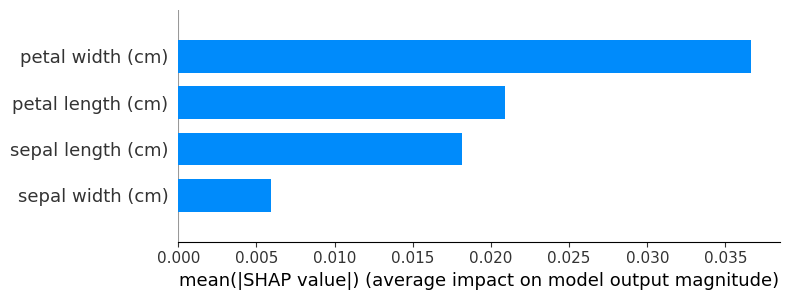

In [ ]:
# Import statements
import shap, matplotlib.pyplot as plt, pandas as pd, numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert data to pandas dataframe as in question
X = pd.DataFrame(data=X, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, test_size=0.2)

## Creating model per question
extra_tree = ExtraTreesRegressor(random_state=42, verbose=2)
extra_tree.fit(X_train, y_train)

# Create Explainer
explainer = shap.TreeExplainer(extra_tree)

# Visualize one value
single_shap_value = explainer(X_test.sample(n=1))
shap.summary_plot(single_shap_value, feature_names=X_test.columns, plot_type='bar')
plt.show()
